In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
df.sample()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
241,241,Asus,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 150MX,Windows 10,2.1kg,61005.6


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop(columns=['Unnamed: 0'],inplace= True)

In [7]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
df['Ram'] = df['Ram'].str.replace("GB", '')


In [9]:
df['Ram'] = df.Ram.astype(int)

In [10]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)


In [11]:
df['Price'] = df['Price'].astype(int)

In [12]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
464,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8,256GB SSD,Nvidia Quadro M2200M,Windows 10,2.67,111355
301,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.90,113060
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201
449,Microsoft,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core i7 7660U 2.5GHz,16,512GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.25,137941
56,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.91,23389


Performing EDA : 

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_472\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

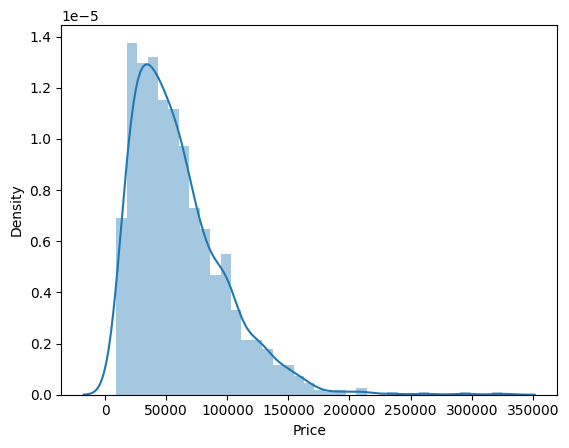

In [14]:
sns.distplot(df['Price'])

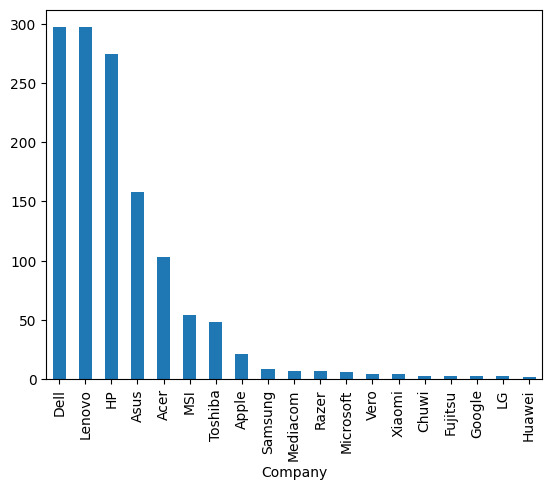

In [15]:
df['Company'].value_counts().plot.bar()
plt.show()

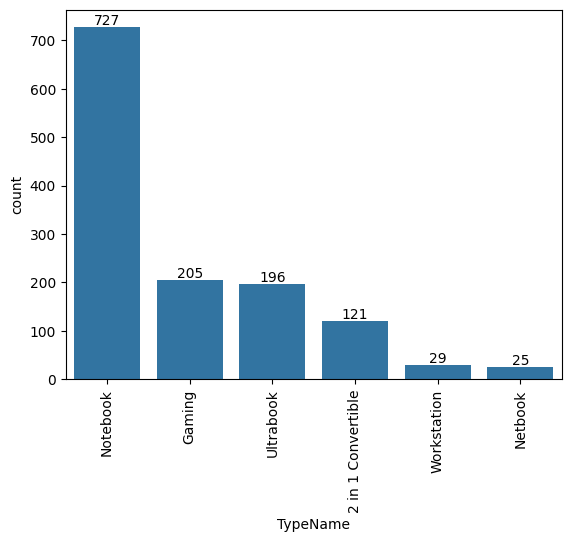

In [16]:
ax = sns.barplot(df['TypeName'].value_counts())
plt.xticks(rotation=90)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height + 5,
        s=int(height), 
        ha='center'
    )
plt.show()

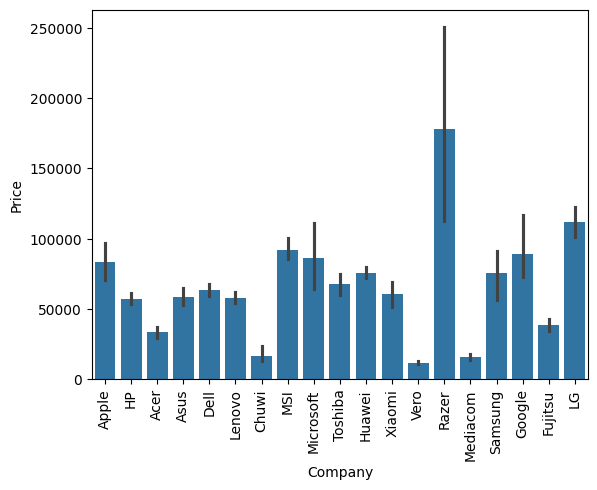

In [17]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

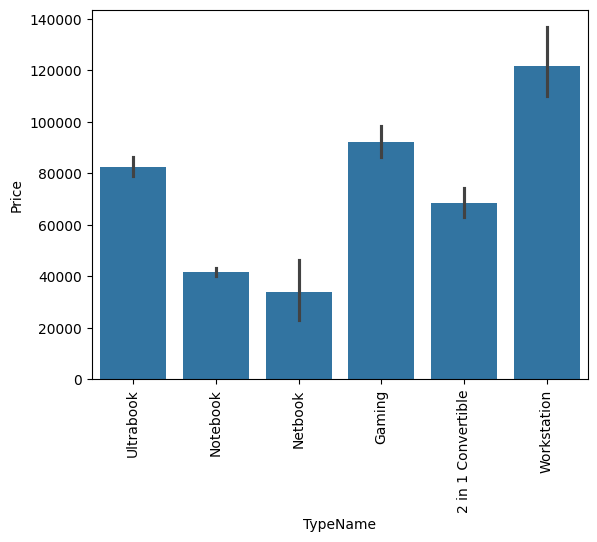

In [18]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

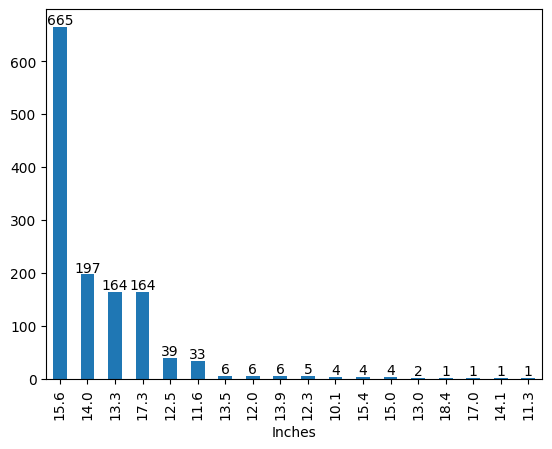

In [19]:
ax = df['Inches'].value_counts().plot(kind='bar')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height + 5,
        s=int(height), 
        ha='center'
    )

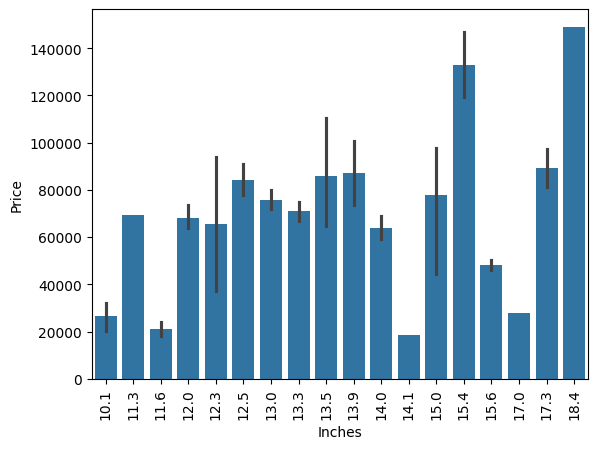

In [20]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [21]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [22]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [23]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992,1
1203,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.20,142790,1
498,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.40,50562,0
666,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.06,50882,0
1133,HP,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.84,40066,0


Text(0.5, 1.0, 'Average Price')

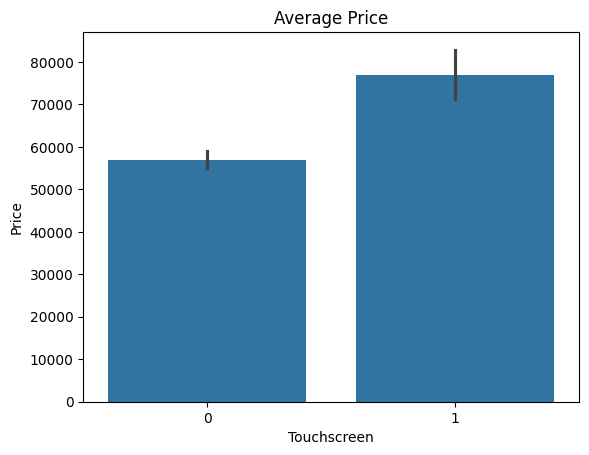

In [24]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])
plt.title('Average Price')

In [25]:
df['Panel'] = df['ScreenResolution'].apply(lambda x:'IPS Panel' if 'IPS Panel' in x else 'Other')

In [26]:
df.sample(7)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Panel
1104,Lenovo,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.40,63882,0,Other
788,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.20,122490,0,IPS Panel
158,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.56,55890,1,Other
559,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,2.18,32921,0,Other
873,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,180GB SSD,Intel HD Graphics 620,Windows 10,1.44,39160,0,IPS Panel
781,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.30,125208,0,IPS Panel
683,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,AMD Radeon R5 520,Windows 10,2.50,37242,0,IPS Panel


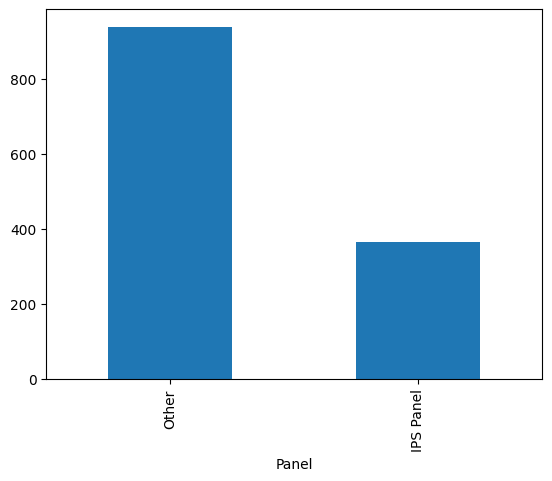

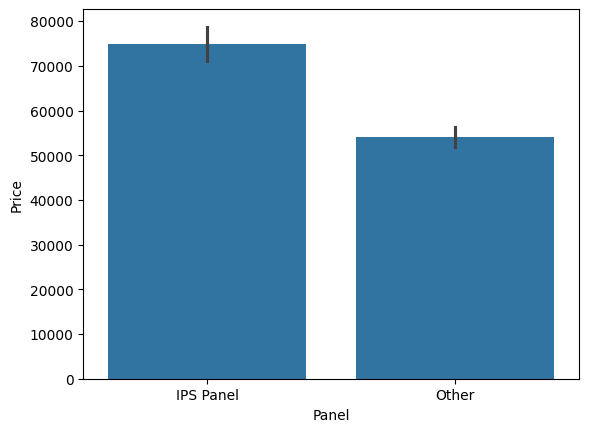

In [27]:
df['Panel'].value_counts().plot(kind='bar')
plt.show()
sns.barplot(x=df['Panel'],y=df['Price'])
plt.show()

In [28]:
df['Resolution']=df['ScreenResolution'].str.split().str[-1]
df['x_Resolution']=df['Resolution'].str.split('x').str[0].astype(int)
df['y_Resolution']=df['Resolution'].str.split('x').str[1].astype(int)

In [29]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Panel,Resolution,x_Resolution,y_Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378,0,IPS Panel,2560x1600,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895,0,Other,1440x900,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,0,Other,1920x1080,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,0,IPS Panel,2880x1800,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095,0,IPS Panel,2560x1600,2560,1600


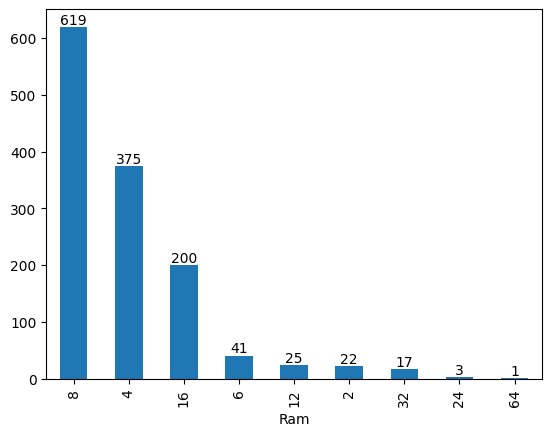

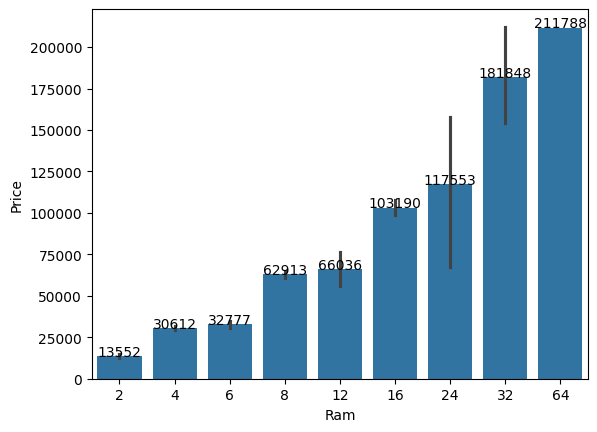

In [30]:
ax = df['Ram'].value_counts().plot(kind='bar')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height + 5,
        s=int(height), 
        ha='center'
    )
plt.show()
ax = sns.barplot(x=df['Ram'],y=df['Price'])
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2, 
        y=height + 5,
        s=int(height), 
        ha='center'
    )
plt.show()

In [31]:
df['PPI']=((((df['x_Resolution']**2 + df['y_Resolution']**2)**0.5)/df['Inches']).round(2)).astype(float)

In [32]:
df.corr(numeric_only=True)['Price']


Inches          0.068196
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
x_Resolution    0.556529
y_Resolution    0.552809
PPI             0.473505
Name: Price, dtype: float64

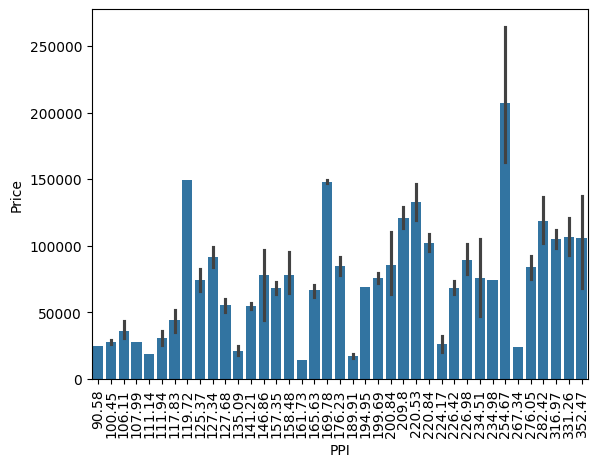

In [33]:
sns.barplot(x=df['PPI'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   int64  
 11  Touchscreen       1303 non-null   int64  
 12  Panel             1303 non-null   object 
 13  Resolution        1303 non-null   object 
 14  x_Resolution      1303 non-null   int64  
 15  y_Resolution      1303 non-null   int64  
 16  PPI               1303 non-null   float64


In [35]:
df.drop(columns = ['ScreenResolution','x_Resolution','y_Resolution'],inplace=True)

In [36]:
df['Processor'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [37]:
def fetch_processor(text):
    if text in ["Intel Core i7" ,"Intel Core i5", "Intel Core i3"]:
        return text
    elif text.split()[0] == "Intel" :
        return 'Intel'
    else :
        return 'AMD'

In [38]:
df['Processor'] = df['Processor'].apply(fetch_processor)

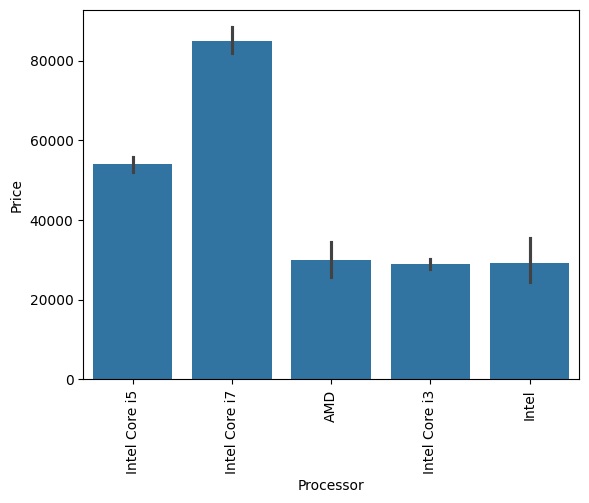

In [39]:
sns.barplot(x=df['Processor'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [40]:
df.drop(columns=['Cpu'],inplace= True)

In [41]:
df['Gpu_Brand'] = df['Gpu'].str.split(n=1).str[0]

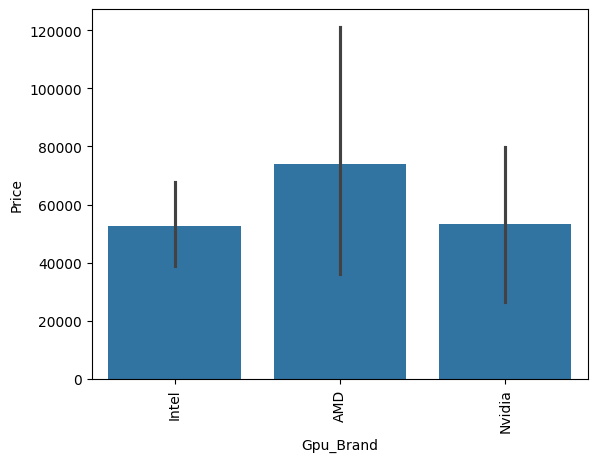

In [42]:
sns.barplot(x=df['Gpu_Brand'].head(25),y=df['Price'])
plt.xticks(rotation ='vertical')
plt.show()

In [43]:
import re

def parse_memory(text):
    # Match size + unit + optional type (SSD, HDD, Flash Storage, etc.)
    pattern = r'(\d+)(GB|TB)\s*(SSD|HDD|Flash Storage|Hybrid|EMMC)?'
    matches = re.findall(pattern, text)

    total_gb = 0
    types = set()

    for size, unit, mem_type in matches:
        size = int(size)
        if unit == 'TB':
            size *= 1024  # Convert TB to GB
        total_gb += size

        if mem_type:
            types.add(mem_type.strip())

    return pd.Series([total_gb, '+'.join(sorted(types))])


# Apply it
df[['Total_Memory', 'Memory_Types']] = df['Memory'].apply(parse_memory)


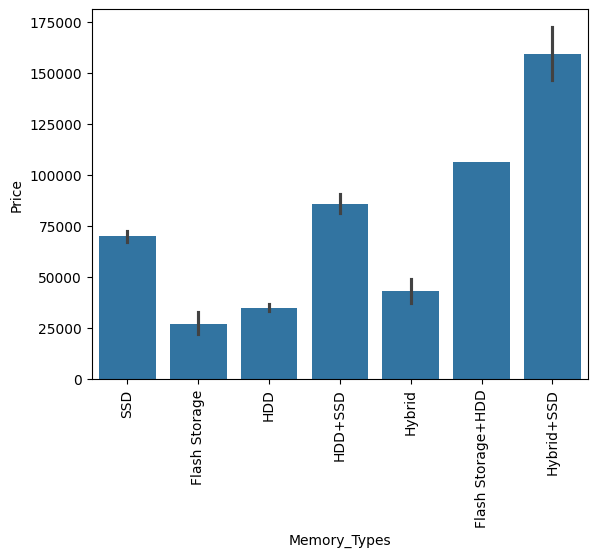

In [44]:
sns.barplot(x=df['Memory_Types'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

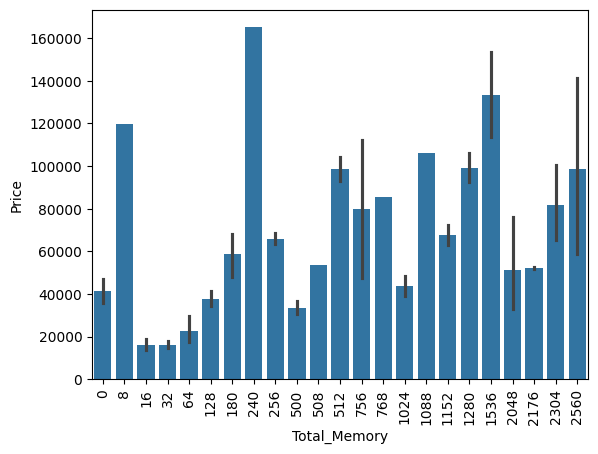

In [45]:
sns.barplot(x=df['Total_Memory'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [46]:
df.drop(columns=['Memory','Gpu','Resolution'],inplace=True)

In [47]:
df.sample(3)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,Panel,PPI,Processor,Gpu_Brand,Total_Memory,Memory_Types
999,HP,Ultrabook,14.0,8,Windows 10,1.48,111301,0,Other,157.35,Intel Core i7,Intel,512,SSD
344,Dell,Ultrabook,13.3,8,Windows 10,1.20,84129,0,Other,165.63,Intel Core i7,Intel,256,SSD
285,Acer,Notebook,15.6,12,Windows 10,2.15,35111,1,IPS Panel,141.21,Intel Core i7,Intel,1024,HDD


In [48]:
df.loc[(df['OpSys'] == 'No OS') & (df['Company'] == 'Lenovo'), 'OpSys'] = 'Windows'
df.loc[(df['OpSys'] == 'No OS') & (df['Company'] == 'HP'), 'OpSys'] = 'Windows'
df.loc[(df['OpSys'] == 'No OS') & (df['Company'] == 'Asus'), 'OpSys'] = 'Windows'
df.loc[(df['OpSys'] == 'No OS') & (df['Company'] == 'Xiaomi'), 'OpSys'] = 'Chrome OS'
df.loc[(df['OpSys'] == 'Windows 10'), 'OpSys'] = 'Windows'
df.loc[(df['OpSys'] == 'Windows 10 S'), 'OpSys'] = 'Windows'
df.loc[(df['OpSys'] == 'Windows 7'), 'OpSys'] = 'Windows'
df.loc[(df['OpSys'] == 'Mac OS X'), 'OpSys'] = 'macOS'

In [49]:
df['OpSys'].value_counts()

OpSys
Windows      1188
Linux          62
Chrome OS      30
macOS          21
Android         2
Name: count, dtype: int64

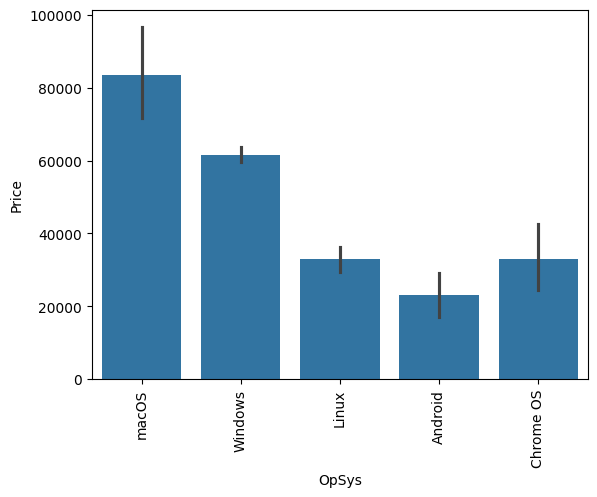

In [50]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: >

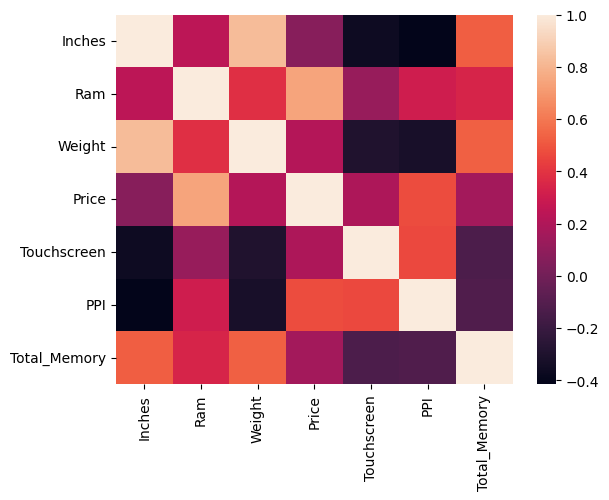

In [51]:
sns.heatmap(df.corr(numeric_only=True))

In [52]:
x = df.drop(columns='Price')
y = np.log(df['Price'])

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=15) 

In [54]:
y_test

94      10.931141
709     10.460185
296     10.862090
450     10.353958
396     11.089958
          ...    
1216    10.369138
1129    11.004647
185     11.320917
661     10.013418
763     11.004647
Name: Price, Length: 261, dtype: float64

In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [56]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor

Linear Regression 

In [57]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company', 'TypeName', 'OpSys', 'Panel' ,'Processor', 'Gpu_Brand', 'Memory_Types'])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.811403175284126
MAE 0.20463706464658782


Ridge Regression

In [58]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company', 'TypeName', 'OpSys', 'Panel' ,'Processor', 'Gpu_Brand', 'Memory_Types'])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.811030294457017
MAE 0.20697399471508388


Lasso Regression

In [59]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company', 'TypeName', 'OpSys', 'Panel' ,'Processor', 'Gpu_Brand', 'Memory_Types'])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8103544883519257
MAE 0.20734043765815205


KNN

In [60]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company', 'TypeName', 'OpSys', 'Panel' ,'Processor', 'Gpu_Brand', 'Memory_Types'])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7611567597407354
MAE 0.21858534731003354


Decision Tree

In [61]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company', 'TypeName', 'OpSys', 'Panel' ,'Processor', 'Gpu_Brand', 'Memory_Types'])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.809524007774355
MAE 0.1910725856167732


SVM

In [62]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company', 'TypeName', 'OpSys', 'Panel' ,'Processor', 'Gpu_Brand', 'Memory_Types'])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8350933648737876
MAE 0.18439091316153824


Random Forest

In [63]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company', 'TypeName', 'OpSys', 'Panel' ,'Processor', 'Gpu_Brand', 'Memory_Types'])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8697652885255321
MAE 0.16065965068088617


ExtraTrees

In [64]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company', 'TypeName', 'OpSys', 'Panel' ,'Processor', 'Gpu_Brand', 'Memory_Types'])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15,
                              bootstrap= True)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8747428794361939
MAE 0.15731853706697738


AdaBoost

In [65]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company', 'TypeName', 'OpSys', 'Panel' ,'Processor', 'Gpu_Brand', 'Memory_Types'])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7867315188925369
MAE 0.22305852708205495


Gradient Boost

In [66]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company', 'TypeName', 'OpSys', 'Panel' ,'Processor', 'Gpu_Brand', 'Memory_Types'])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8828873002156287
MAE 0.15245275595705815


XgBoost

In [67]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company', 'TypeName', 'OpSys', 'Panel' ,'Processor', 'Gpu_Brand', 'Memory_Types'])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8540885178716444
MAE 0.16528923569222675


Voting Regressor

In [68]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company', 'TypeName', 'OpSys', 'Panel' ,'Processor', 'Gpu_Brand', 'Memory_Types'])
],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.874450703470905
MAE 0.1585591056261197


Stacking

In [69]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),['Company', 'TypeName', 'OpSys', 'Panel' ,'Processor', 'Gpu_Brand', 'Memory_Types'])
],remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8670034058232589
MAE 0.1639239301943029


In [70]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [71]:
df.sample()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Touchscreen,Panel,PPI,Processor,Gpu_Brand,Total_Memory,Memory_Types
352,MSI,Gaming,17.3,8,Windows,2.7,75071,0,Other,127.34,Intel Core i7,Nvidia,1152,HDD+SSD


In [72]:
df['Ram'].sort_values().unique()

array([ 2,  4,  6,  8, 12, 16, 24, 32, 64])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Inches        1303 non-null   float64
 3   Ram           1303 non-null   int64  
 4   OpSys         1303 non-null   object 
 5   Weight        1303 non-null   float64
 6   Price         1303 non-null   int64  
 7   Touchscreen   1303 non-null   int64  
 8   Panel         1303 non-null   object 
 9   PPI           1303 non-null   float64
 10  Processor     1303 non-null   object 
 11  Gpu_Brand     1303 non-null   object 
 12  Total_Memory  1303 non-null   int64  
 13  Memory_Types  1303 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 142.6+ KB
